# Part 1
## 1
*Read in data, noting that the start and end dates should be parsed as datetime objects.  Assign new columns to your dataframe for the `start_date` month, year, day of the week, and hour.*

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("../data/201402_trip_data.csv", parse_dates=['start_date', 'end_date'])

In [3]:
df.head()

,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_#,subscription_type,zip_code
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144015 entries, 0 to 144014
Data columns (total 11 columns):
trip_id              144015 non-null int64
duration             144015 non-null int64
start_date           144015 non-null datetime64[ns]
start_station        144015 non-null object
start_terminal       144015 non-null int64
end_date             144015 non-null datetime64[ns]
end_station          144015 non-null object
end_terminal         144015 non-null int64
bike_#               144015 non-null int64
subscription_type    144015 non-null object
zip_code             137885 non-null object
dtypes: datetime64[ns](2), int64(5), object(4)
memory usage: 12.1+ MB


In [5]:
df['month'] = df['start_date'].dt.month
df['year'] = df['start_date'].dt.year
df['day_of_week'] = df['start_date'].dt.dayofweek
df['hour'] = df['start_date'].dt.hour
df.head()

,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_#,subscription_type,zip_code,month,year,day_of_week,hour
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127,8,2013,3,14
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138,8,2013,3,14
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214,8,2013,3,10
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060,8,2013,3,11
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103,8,2013,3,12


## 2
*Group by month, and count the number of trips.*

In [6]:
df.groupby('month').count()[['trip_id']]

,trip_id
month,
1,24428
2,19024
8,2102
9,25243
10,29105
11,24219
12,19894


### Key Finding
We note that no data exists from March through July.  Also, the counts for August are much lower than other months.  This is evidence that August might also be a partial month:

In [7]:
df['date'] = df['start_date'].dt.date
df[df['month']==8].groupby('date').count()[['trip_id']]

,trip_id
date,
2013-08-29,748
2013-08-30,714
2013-08-31,640


so we only have parial data for that month.  If we are looking at month by month statisitics, we'll need to exclude this, as it could be misleading.

In [8]:
count_dict = df.groupby('month').count()['trip_id'].to_dict()
count_dict

{1: 24428, 2: 19024, 8: 2102, 9: 25243, 10: 29105, 11: 24219, 12: 19894}

In [9]:
date_dict = {8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec', 1:'Jan', 2:'Feb'}
ordered_months = [x for x in range(8,13)] + [x for x in range(1,3)]
print(date_dict)
print(ordered_months)

{8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec', 1: 'Jan', 2: 'Feb'}
[8, 9, 10, 11, 12, 1, 2]


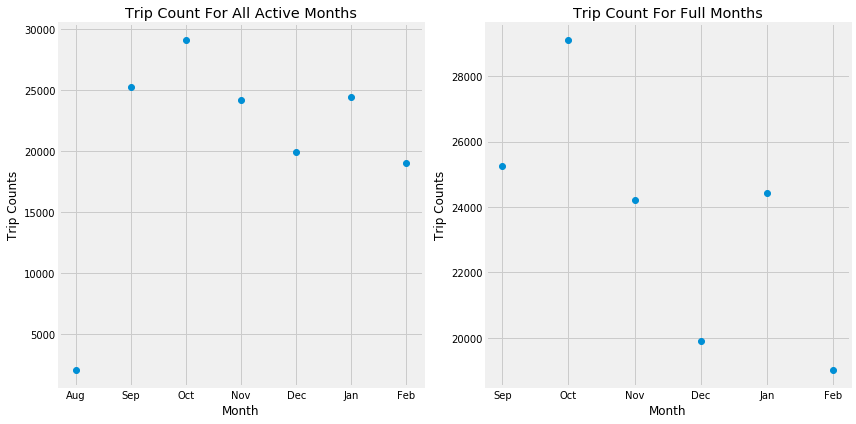

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot([date_dict[x] for x in ordered_months], 
        [count_dict[x] for x in ordered_months], 
        marker='.', markersize=12, linestyle="None")
ax[0].set_title("Trip Count For All Active Months")
ax[0].set_xlabel("Month")
ax[0].set_ylabel("Trip Counts")

ax[1].plot([date_dict[x] for x in ordered_months[1:]], 
        [count_dict[x] for x in ordered_months[1:]], 
        marker='.', markersize=12, linestyle="None")
ax[1].set_title("Trip Count For Full Months")
ax[1].set_xlabel("Month")
ax[1].set_ylabel("Trip Counts")
plt.tight_layout()

## 3
*Plot the daily trip count from September to December*

In [11]:
df_short = df[df.month>8]
df_short.head()

,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_#,subscription_type,zip_code,month,year,day_of_week,hour,date
2102,7442,1508,2013-09-01 00:11:00,Mechanics Plaza (Market at Battery),75,2013-09-01 00:36:00,Beale at Market,56,506,Customer,55405,9,2013,6,0,2013-09-01
2103,7443,1513,2013-09-01 00:12:00,Mechanics Plaza (Market at Battery),75,2013-09-01 00:37:00,Beale at Market,56,334,Customer,55405,9,2013,6,0,2013-09-01
2104,7444,1345,2013-09-01 00:19:00,South Van Ness at Market,66,2013-09-01 00:41:00,Harry Bridges Plaza (Ferry Building),50,464,Customer,NaN,9,2013,6,0,2013-09-01
2105,7445,931,2013-09-01 00:21:00,Mechanics Plaza (Market at Battery),75,2013-09-01 00:36:00,Mechanics Plaza (Market at Battery),75,422,Customer,NaN,9,2013,6,0,2013-09-01
2106,7446,159,2013-09-01 00:23:00,Broadway at Main,25,2013-09-01 00:25:00,Franklin at Maple,21,239,Subscriber,94063,9,2013,6,0,2013-09-01


In [12]:
df_short.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98461 entries, 2102 to 100562
Data columns (total 16 columns):
trip_id              98461 non-null int64
duration             98461 non-null int64
start_date           98461 non-null datetime64[ns]
start_station        98461 non-null object
start_terminal       98461 non-null int64
end_date             98461 non-null datetime64[ns]
end_station          98461 non-null object
end_terminal         98461 non-null int64
bike_#               98461 non-null int64
subscription_type    98461 non-null object
zip_code             93693 non-null object
month                98461 non-null int64
year                 98461 non-null int64
day_of_week          98461 non-null int64
hour                 98461 non-null int64
date                 98461 non-null object
dtypes: datetime64[ns](2), int64(9), object(5)
memory usage: 12.8+ MB


In [13]:
grouped = df_short.groupby(['date'])['trip_id'].count()
grouped

date
2013-09-01     706
2013-09-02     661
2013-09-03     597
2013-09-04     606
2013-09-05     677
2013-09-06     814
2013-09-07     796
2013-09-08     704
2013-09-09     769
2013-09-10     892
2013-09-11     880
2013-09-12     942
2013-09-13     981
2013-09-14     702
2013-09-15     624
2013-09-16     914
2013-09-17    1073
2013-09-18    1110
2013-09-19    1044
2013-09-20    1102
2013-09-21     388
2013-09-22     584
2013-09-23    1050
2013-09-24    1075
2013-09-25    1264
2013-09-26    1082
2013-09-27    1101
2013-09-28     612
2013-09-29     517
2013-09-30     976
              ... 
2013-12-02     878
2013-12-03     917
2013-12-04     992
2013-12-05     936
2013-12-06     727
2013-12-07     277
2013-12-08     274
2013-12-09     807
2013-12-10     878
2013-12-11     903
2013-12-12     966
2013-12-13     962
2013-12-14     392
2013-12-15     319
2013-12-16     946
2013-12-17     975
2013-12-18     928
2013-12-19     935
2013-12-20     867
2013-12-21     354
2013-12-22     307
2013-12

In [14]:
type(grouped)

pandas.core.series.Series

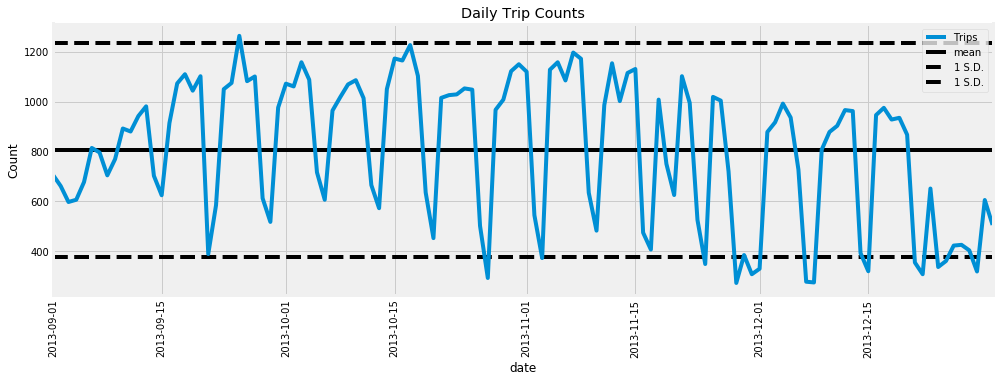

In [15]:
mu = np.mean(grouped)
std = np.std(grouped)
ax = grouped.plot(figsize=(15,5), rot=90, label="Trips")
ax.set_ylabel("Count")
ax.set_title("Daily Trip Counts")
ax.hlines(mu, xmin=df_short['date'].min(), xmax=df_short['date'].max(), label="mean")
ax.hlines(mu + 1.5*std, xmin=df_short['date'].min(), xmax=df_short['date'].max(), linestyle="--", label="1 S.D.")
ax.hlines(mu - 1.5*std, xmin=df_short['date'].min(), xmax=df_short['date'].max(), linestyle="--", label="1 S.D.")
ax.legend();

## 4
*Plot the distribution of the daily trip counts for all months as a histogram. Fit a KDE to the histogram.*

In [16]:
from scipy.stats.kde import gaussian_kde

In [17]:
daily_counts = np.array(df.groupby('date')['trip_id'].count())
daily_counts

array([ 748,  714,  640,  706,  661,  597,  606,  677,  814,  796,  704,
        769,  892,  880,  942,  981,  702,  624,  914, 1073, 1110, 1044,
       1102,  388,  584, 1050, 1075, 1264, 1082, 1101,  612,  517,  976,
       1072, 1061, 1158, 1088,  716,  606,  964, 1018, 1069, 1086, 1014,
        665,  572, 1050, 1173, 1165, 1227, 1103,  635,  452, 1015, 1026,
       1029, 1053, 1048,  501,  292,  967, 1008, 1122, 1150, 1120,  544,
        372, 1128, 1158, 1085, 1197, 1172,  634,  482,  986, 1154, 1002,
       1115, 1131,  474,  406, 1008,  750,  625, 1102,  995,  525,  348,
       1019, 1004,  720,  272,  384,  307,  329,  878,  917,  992,  936,
        727,  277,  274,  807,  878,  903,  966,  962,  392,  319,  946,
        975,  928,  935,  867,  354,  307,  651,  336,  360,  422,  425,
        403,  318,  605,  505,  359,  767,  779,  356,  296,  915,  967,
        967,  980,  983,  247,  351, 1015, 1027, 1100, 1097, 1014,  443,
        397,  615, 1011, 1071, 1094, 1021,  444,  3

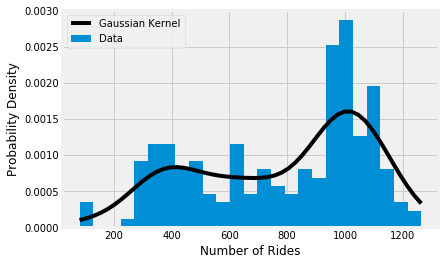

In [18]:
kde = gaussian_kde(daily_counts)
_x = np.linspace(np.min(daily_counts), np.max(daily_counts))
fig, ax = plt.subplots()
ax.hist(daily_counts, density=True, bins=25, label="Data")
ax.plot(_x, kde(_x), c='k', label='Gaussian Kernel')
ax.set_xlabel("Number of Rides")
ax.set_ylabel("Probability Density")
_ = ax.legend(loc='upper left')

In [19]:
def kde_confidence_intervals(kde, r_low, r_high):
    p5, p95 = (r_low, 100), (r_high, 100)
    for i in range(r_low, r_high):
        cdf = kde.integrate_box_1d(0,i)
        d5, d95 = np.abs(.025-cdf), np.abs(.975-cdf)
        if d5<p5[1]:
            p5 = (i, d5)
        if d95<p95[1]:
            p95 = (i, d95)
    return p5[0], p95[0]
        
ce = kde_confidence_intervals(kde, 0, 1400)
print("95% confidence interval: {} to {}".format(ce[0], ce[1]))

95% confidence interval: 191 to 1261


The presence of multiple peaks leads us to the conclusion that this is a multi-modal distribution.  We will segregate week end and week day ride counts

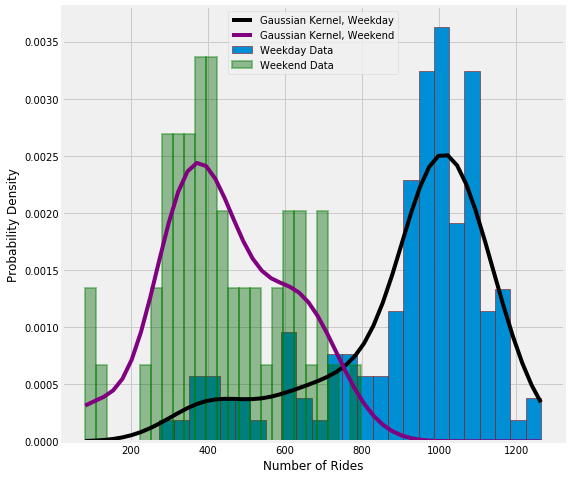

In [20]:
weekday_counts = np.array(df[df.day_of_week<5].groupby('date')['trip_id'].count())
weekend_counts = np.array(df[df.day_of_week>=5].groupby('date')['trip_id'].count())
kde = gaussian_kde(weekday_counts)
kde_we = gaussian_kde(weekend_counts)

_x = np.linspace(np.min(daily_counts), np.max(daily_counts))


fig, ax = plt.subplots(figsize=(8,8))
ax.hist(weekday_counts, density=True, bins=25, edgecolor='darkred', label="Weekday Data")
ax.plot(_x, kde(_x), c='k', label='Gaussian Kernel, Weekday')
ax.hist(weekend_counts, density=True, bins=25, color='darkgreen', alpha=.4, edgecolor='g', linewidth=2, label="Weekend Data")
ax.plot(_x, kde_we(_x), c='purple', label='Gaussian Kernel, Weekend')
ax.set_xlabel("Number of Rides")
ax.set_ylabel("Probability Density")
_ = ax.legend(loc='best')

In [21]:
ce = kde_confidence_intervals(kde, 0, 1400)
print("95% confidence interval for weekdays: {} to {}".format(ce[0], ce[1]))

ce_we = kde_confidence_intervals(kde_we, 0, 1400)
print("95% confidence interval for weekdays: {} to {}".format(ce_we[0], ce_we[1]))

95% confidence interval for weekdays: 343 to 1246
95% confidence interval for weekdays: 102 to 799


It's interesting to note, the weekday upper bound *decreases* due to the more precise KDE fit!

## 5
*Make a boxplot of the hours in the day (x) against the number of users (y) in that given hour.*

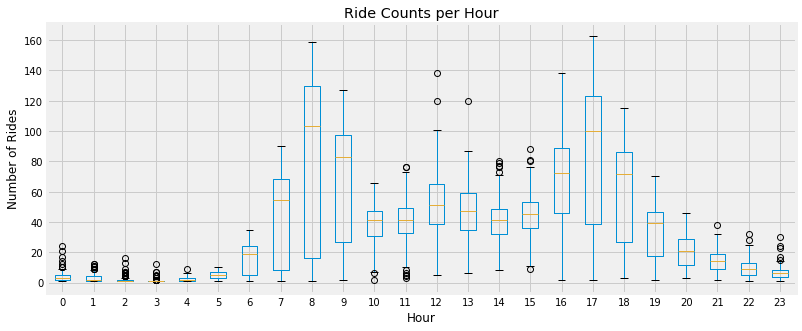

In [22]:
fig, ax = plt.subplots(figsize=(13,5))
df.groupby(['date', 'hour']).count()[['trip_id']].boxplot(by='hour', 
                                      figsize=(12,5), ax=ax)
ax.set_xlabel("Hour")
ax.set_ylabel("Number of Rides")
ax.set_title("Ride Counts per Hour")
_ = fig.suptitle(None)

## 6
*Someone from the analytics team made a line plot (right) that he claims is showing the same information as your boxplot (left). What information can you gain from the boxplot that is missing in the line plot?*

The scatter plot shown in no way communicates the uncertainty associated with hourly ride expectations.  In particular, hours 8 and 17 (the peak ours) are associated with a wide range of uncertainty.

## 7

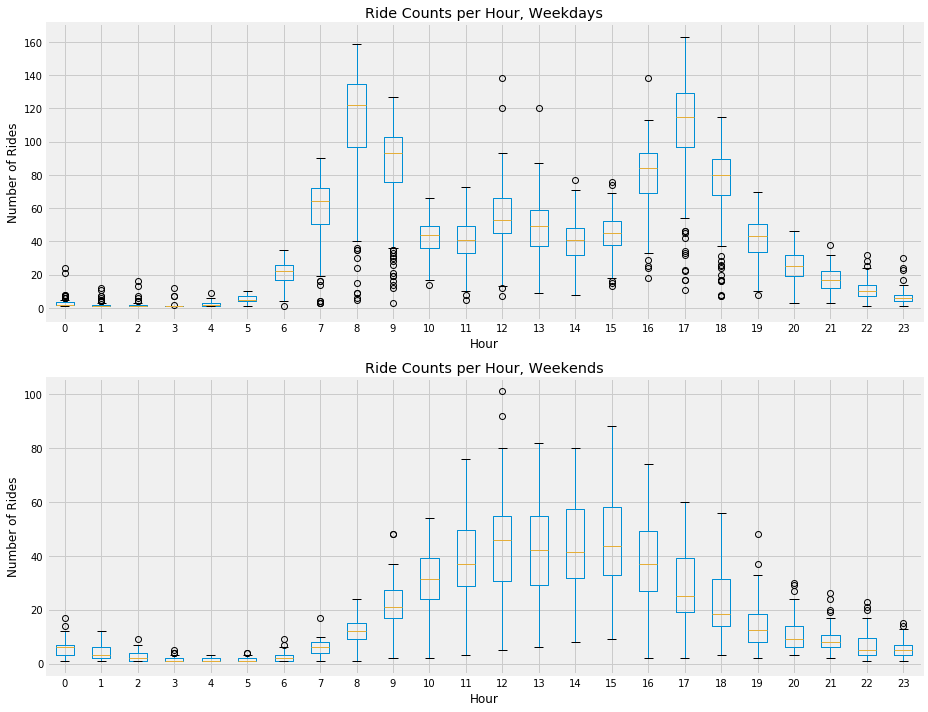

In [23]:
fig, ax = plt.subplots(2,1, figsize=(13,10))
df[df.day_of_week<5].groupby(['date', 'hour']).count()[['trip_id']].boxplot(by='hour', figsize=(12,5), ax=ax[0])
ax[0].set_xlabel("Hour")
ax[0].set_ylabel("Number of Rides")
ax[0].set_title("Ride Counts per Hour, Weekdays")

df[df.day_of_week>=5].groupby(['date', 'hour']).count()[['trip_id']].boxplot(by='hour', figsize=(12,5), ax=ax[1])
ax[1].set_xlabel("Hour")
ax[1].set_ylabel("Number of Rides")
ax[1].set_title("Ride Counts per Hour, Weekends")
_ = fig.suptitle(None)
plt.tight_layout()

We can see that the primary driver in the spread for high variance instances in the original plot are due to day of week fluctuations. The weekday plot shows the same general trend, but there is much less spread associated with peak hours.

## 8 
*There are two types of bike users (specified by column Subscription Type: Subscriber and Customer. Given this information and the weekend and weekday categorization, plot and inspect the user activity trends.*

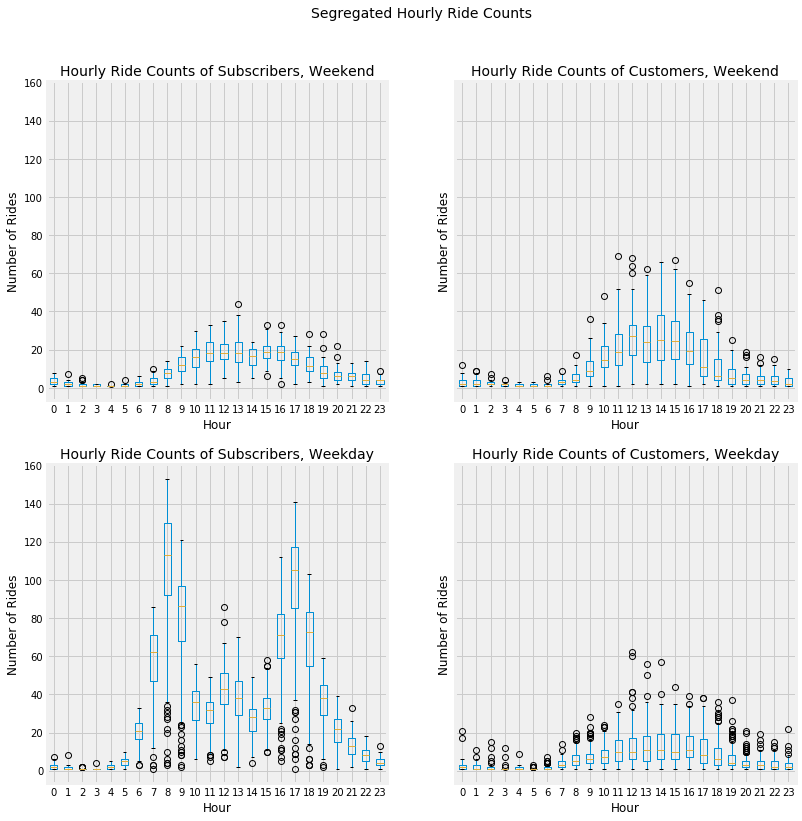

In [24]:
import matplotlib 
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)

from itertools import product
fig, ax = plt.subplots(2,2, figsize=(13,13), sharey=True)
ax = ax.reshape(-1,)
for i, types in enumerate(product(['Weekend', 'Weekday'], ['Subscriber', 'Customer'])):
    if types[0]=='Weekday':
        df[(df.day_of_week<5) & (df['subscription_type']==types[1])].groupby(['date', 'hour']).count()[['trip_id']].boxplot(by='hour', figsize=(12,5), ax=ax[i])
    else:
        df[(df.day_of_week>=5) & (df['subscription_type']==types[1])].groupby(['date', 'hour']).count()[['trip_id']].boxplot(by='hour', figsize=(12,5), ax=ax[i])
        
    ax[i].set_xlabel("Hour")
    ax[i].set_ylabel("Number of Rides")
    ax[i].set_title("Hourly Ride Counts of {}s, {}".format(types[1], types[0]), fontsize=14)
_ = fig.suptitle("Segregated Hourly Ride Counts", fontsize=14)

*Suppose the product team wants to run a promotional campaign, what are your suggestions in terms of who the promotion should apply to and when it should apply for the campaign to be effective?*

**Note**, without having a great sense of what the charge scheme for customers/subscribers are, it's a bit challenging to say.  If you make assumptions, you should justify them explicitly.

It seems that our service is not nearly as popular on the weekends as it is during the weekdays, particularly amongst subscribers.  We could make better use of our existing assets by attracking more non-recurring customers on the weekends.  On the same note, we have a spike in demand during rush hour.  We could consider discounts to subscribers who restrict their bike use during these times to combat scarcity.


In [25]:
from scipy.stats import chi2_contingency

customer = df[(df.day_of_week>=5) & (df['subscription_type']=='Customer')].groupby(['hour']).count()['trip_id'].values
subscriber = df[(df.day_of_week>=5) & (df['subscription_type']=='Subscriber')].groupby(['hour']).count()['trip_id'].values
chi2, p, dof, exp = chi2_contingency(np.concatenate((customer.reshape(1,-1), subscriber.reshape(1,-1))))

print("P-value of distributional indpendence for weekend rides between customers and subscribers: {0:0.2e}".format(p))

P-value of distributional indpendence for weekend rides between customers and subscribers: 5.83e-95



## 10
*Extra Credit: You are also interested in identifying stations with low usage. Load the csv file data/201402_station_data.csv into a dataframe. The docksize column specifies how many bikes the station can hold. The lat and long columns specify the latitude and longitude of the station.*

1.) Merge the station data with the trip data

2.) Compute usage by counting the total trips starting at a particular station divided by the dockcount

3.) Normalize usage to range from 0to 1

4.) Plot the latitude and longitude of the stations as scatter points. Encode usage information in the size of the points in the scatterplot.

In [26]:
df_station = pd.read_csv("../data/201402_station_data.csv")
df_station.head()

,station_id,name,lat,long,dockcount,landmark,installation
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


## 1.)

In [27]:
df_both = df.merge(df_station, left_on='start_terminal', right_on='station_id')
df_both = df_both.merge(df_station, left_on='end_terminal', right_on='station_id', suffixes=("_start", "_stop"))
df_both.head()

,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_#,subscription_type,...,dockcount_start,landmark_start,installation_start,station_id_stop,name_stop,lat_stop,long_stop,dockcount_stop,landmark_stop,installation_stop
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,...,19,San Francisco,8/23/2013,66,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,8/23/2013
1,4760,113,2013-08-29 17:01:00,South Van Ness at Market,66,2013-08-29 17:03:00,South Van Ness at Market,66,553,Subscriber,...,19,San Francisco,8/23/2013,66,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,8/23/2013
2,5070,168,2013-08-29 21:43:00,South Van Ness at Market,66,2013-08-29 21:46:00,South Van Ness at Market,66,598,Subscriber,...,19,San Francisco,8/23/2013,66,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,8/23/2013
3,4584,262,2013-08-29 14:17:00,South Van Ness at Market,66,2013-08-29 14:21:00,South Van Ness at Market,66,587,Subscriber,...,19,San Francisco,8/23/2013,66,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,8/23/2013
4,4079,995,2013-08-29 09:35:00,South Van Ness at Market,66,2013-08-29 09:52:00,South Van Ness at Market,66,327,Subscriber,...,19,San Francisco,8/23/2013,66,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,8/23/2013


## 2.) & 3.)

In [28]:
df_group_merged = df.groupby('start_terminal').count().merge(df_station, left_on='start_terminal', right_on='station_id')
df_group_merged['usage'] = df_group_merged['trip_id']/df_group_merged['dockcount']
u_min, u_max = np.min(df_group_merged['usage']), np.max(df_group_merged['usage'])
df_group_merged['normed_usage'] = (df_group_merged['usage'] - u_min)/(u_max-u_min)
df_group_merged.head()

,trip_id,duration,start_date,start_station,end_date,end_station,end_terminal,bike_#,subscription_type,zip_code,...,date,station_id,name,lat,long,dockcount,landmark,installation,usage,normed_usage
0,1972,1972,1972,1972,1972,1972,1972,1972,1972,1940,...,1972,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013,73.037037,0.140724
1,346,346,346,346,346,346,346,346,346,302,...,346,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013,23.066667,0.044179
2,855,855,855,855,855,855,855,855,855,833,...,855,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013,77.727273,0.149785
3,335,335,335,335,335,335,335,335,335,327,...,335,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013,17.631579,0.033678
4,715,715,715,715,715,715,715,715,715,694,...,715,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013,47.666667,0.091707


## 4.)

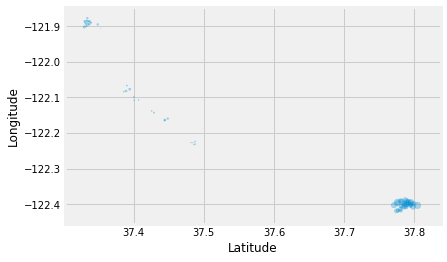

In [29]:
fig, ax = plt.subplots()
ax.scatter(df_group_merged['lat'], df_group_merged['long'], 
           s=50*df_group_merged['normed_usage'], alpha=0.3)
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude');

# Part 2
## 1.)
*We will be using the prestige dataset. Load the data with the following code. Remember to add a column of 1's to the x matrix for the model to fit an intercept.*

In [30]:
import statsmodels.api as sm
plt.style.use('ggplot')

url = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/carData/Duncan.csv'
prestige = pd.read_csv(url)
prestige.head()

,Unnamed: 0,type,income,education,prestige
0,accountant,prof,62,86,82
1,pilot,prof,72,76,83
2,architect,prof,75,92,90
3,author,prof,55,90,76
4,chemist,prof,64,86,90


In [31]:
y = prestige['prestige'].values
x = sm.add_constant(prestige[['income', 'education']].values)

In [32]:
x

array([[  1.,  62.,  86.],
       [  1.,  72.,  76.],
       [  1.,  75.,  92.],
       [  1.,  55.,  90.],
       [  1.,  64.,  86.],
       [  1.,  21.,  84.],
       [  1.,  64.,  93.],
       [  1.,  80., 100.],
       [  1.,  67.,  87.],
       [  1.,  72.,  86.],
       [  1.,  42.,  74.],
       [  1.,  76.,  98.],
       [  1.,  76.,  97.],
       [  1.,  41.,  84.],
       [  1.,  48.,  91.],
       [  1.,  76.,  34.],
       [  1.,  53.,  45.],
       [  1.,  60.,  56.],
       [  1.,  42.,  44.],
       [  1.,  78.,  82.],
       [  1.,  29.,  72.],
       [  1.,  48.,  55.],
       [  1.,  55.,  71.],
       [  1.,  29.,  50.],
       [  1.,  21.,  23.],
       [  1.,  47.,  39.],
       [  1.,  81.,  28.],
       [  1.,  36.,  32.],
       [  1.,  22.,  22.],
       [  1.,  44.,  25.],
       [  1.,  15.,  29.],
       [  1.,   7.,   7.],
       [  1.,  42.,  26.],
       [  1.,   9.,  19.],
       [  1.,  21.,  15.],
       [  1.,  21.,  20.],
       [  1.,  16.,  26.],
 

In [33]:
y

array([82, 83, 90, 76, 90, 87, 93, 90, 52, 88, 57, 89, 97, 59, 73, 38, 76,
       81, 45, 92, 39, 34, 41, 16, 33, 53, 67, 57, 26, 29, 10, 15, 19, 10,
       13, 24, 20,  7,  3, 16,  6, 11,  8, 41, 10])

In [34]:
type(prestige)

pandas.core.frame.DataFrame

## 2.)
*Make a scatter matrix and a boxplot*

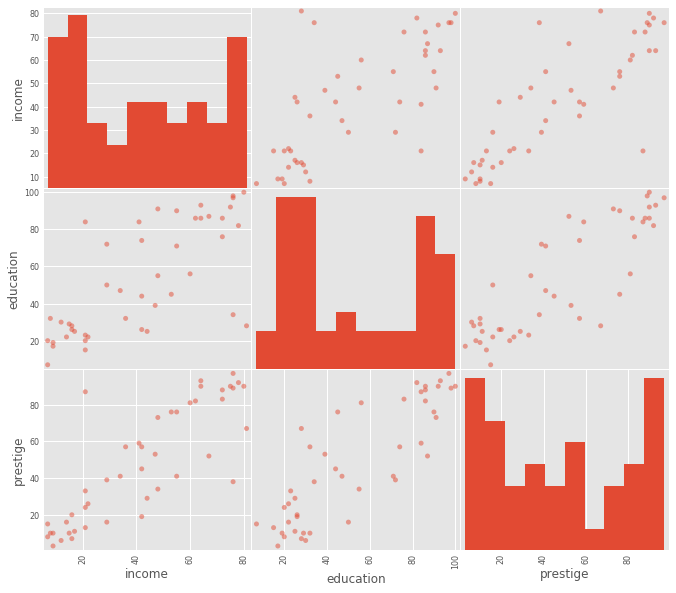

In [35]:
from pandas.plotting import scatter_matrix

_ = scatter_matrix(prestige, figsize=(10,10), alpha=0.5, s=100)

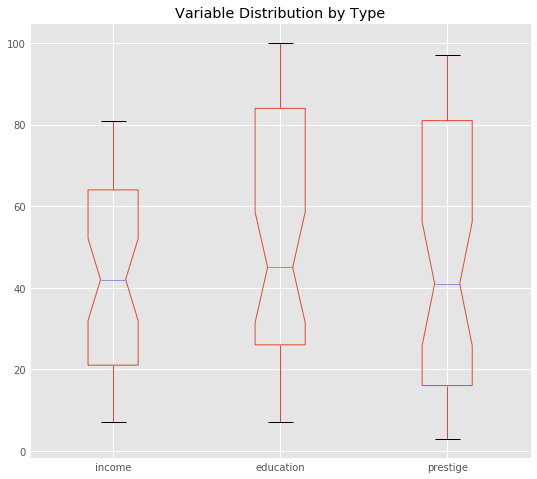

In [36]:
fig, ax = plt.subplots(figsize=(8,8))
prestige.boxplot(ax=ax, notch=True)
ax.set_title("Variable Distribution by Type");

## 3
*Using numpy, write a function that solves the normal equation.*

In [37]:
def solve_normal(X, y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

def R_squared(X, y, beta):
    y_hat = np.mean(y)
    ss_tot = np.sum(np.power(y-y_hat, 2))
    ss_res = np.sum(np.power(x.dot(beta)-y, 2))
    return 1- ss_res/ss_tot

beta = solve_normal(x, y)
R_squared(x, y, beta)

0.8281734172543814

## 4
*Verify your results using statsmodels. Use the code below as a reference.*

In [38]:
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           8.65e-17
Time:                        21:55:49   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.0647      4.272     -1.420      0.163     -14.686       2.556
x1             0.5987      0.120      5.003      0.000       0.357       0.840
x2             0.5458      0.098      5.555      0.000       0.348       0.744
==============================================================================
Omnibus:                        1.279   Durbin-Watson:                   1.458
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.520
Skew:                           0.155   Prob(JB):                        0.771
Kurtosis:                       3.426   Cond. No.                         163.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 5
*Interpret your result summary, focusing on the beta coefficients and the R2.*

The dataset is fairly simple, and with no treatement we can account for a large portion of the variance of the dataset.  Visually, we might anticipate some of the issues we're trying to see (namely that education and income also have a linear relationship).  The beta coefficients of .598 and .545 mean that the two have equal footing given they are on relatively the same scale.